In [1]:
# default_exp thompson_sampler

# thompson_sampler
> implementation of the thompson samplers 

In [6]:
# export

import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.cm as cm


class GaussianBandit(object):

    def __init__(self, num_options = 2, mean_prior = 0, std_prior = 1):
        """initialize BetaBandit"""
        self.num_options = num_options

        #setting the prior, either uninformative or user generated
#         if prior == None:
#             self.prior = np.ones(shape=(num_options,2))
#         else:
#             assert prior.shape == (num_options,2), f"the prior seems to have wrong dimensionality, please conform to (num_options, 2){(num_options,2)}"
#             self.prior = prior

        self.trials = np.zeros(shape=(num_options,))
        self.sum_x = np.zeros(shape=(num_options,))
        self.sum_x2 = np.zeros(shape=(num_options,))

        self.mean_prior = mean_prior
        self.std_prior = std_prior

    def choose_arm(self):
        """draw from arms.
        arm with the highest expected outcome wins. 
        expected outcome is determined stochastically, so even an arm with bad 
        outcome until now will have a chance of being drawn"""

        sampled_outcomes = []
        for i in range(self.num_options):
            
            if self.trials[i] > 1:
                mean = self.compute_online_mean(i)
                stdev = self.compute_online_std(i, mean)
            else:
                mean = 0
                stdev = 1
            

            dist = stats.norm(mean,stdev)
            
            sampled_outcome = dist.rvs()
            #print(sampled_outcome)
            
            sampled_outcomes += [sampled_outcome]
            
        return np.argmax(sampled_outcomes)
      
        #return(sampled_outcomes.argmax(sampled_outcomes))   
        
    def update(self, arm, outcome):
        """update parameters of specific arm"""
        #count times arm has been drawn"""
        self.trials[arm] = self.trials[arm] +1
        #count number of successes on that arm"""

        # for decay factors: self.successes = self.successes *.99
        
        self.sum_x[arm] += outcome
        self.sum_x2[arm] += outcome*outcome
        
        
    def compute_online_mean(self, arm):
        return self.sum_x[arm] / (self.trials[arm])
    
    def compute_online_std(self, arm, mean = None):
        mean = mean or self.compute_online_mean(arm)
        #np max against degeneration)
        return np.max([np.sqrt((self.sum_x2[arm] / (self.trials[arm])) - (mean * mean)), 0.00001])
        
        

        
    def plot_params(self):
        """plot the distributions that underly the arms"""
        
        w = 10
        z = 5
        colors = iter(cm.rainbow(np.linspace(0, 1, self.num_options)))
            
        for k,i in enumerate(range(self.num_options)):
                color = next(colors)
                
                
            
            
                if self.trials[i] > 1:
                    mean = self.compute_online_mean(i)
                    stdev = self.compute_online_std(i, mean)
                else:
                    mean = 0
                    stdev = 1


                dist = stats.norm(mean,stdev)

                x = np.linspace(-6,6,100)
                y = dist.pdf(x)
                plt.plot(x,y,color=color,label="arm #%i"%(i+1))
                plt.fill_between(x,0,y,alpha=1/self.num_options,color=color)
                leg = plt.legend()
                plt.tight_layout
     

            


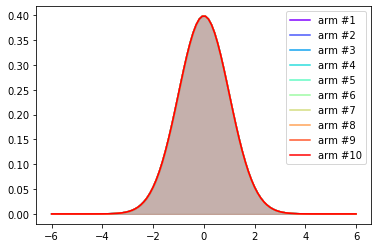

In [7]:
%matplotlib inline

num_arms = 10
gb = GaussianBandit(num_arms)

gb.plot_params()

In [8]:
np.mean([gb.choose_arm() for x in range(100)]), np.histogram([gb.choose_arm() for x in range(100)], bins=list(range(num_arms)))

(4.34,
 (array([ 7,  9, 15,  5, 12,  9,  8, 12, 23]),
  array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])))

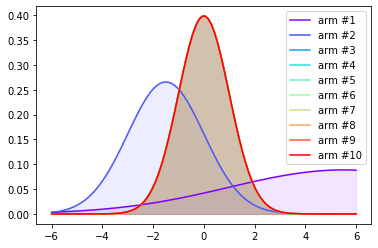

In [9]:
gb.update(0, 10)
gb.update(0, 1)
gb.update(1, -3)
gb.update(1, 0)

gb.plot_params()

In [10]:
np.mean([gb.choose_arm() for x in range(100)]), np.histogram([gb.choose_arm() for x in range(100)], bins=list(range(num_arms)))

(1.14,
 (array([73,  2,  3,  6,  2,  3,  3,  2,  6]),
  array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])))